In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

In [2]:
data_folder = './data'
n = 3311925
s = int(n * 0.01) # sample 1% for analysis
skip = sorted(random.sample(range(1,n+1),n-s))
df = pd.read_csv(os.path.join(data_folder, 'intermediate.csv'), skiprows=skip, index_col=0)
print(df.shape)
df.head()

(33119, 109)


,no_municipio_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,no_municipio_nascimento,sg_uf_nascimento,tp_st_conclusao,...,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
68,Embu das Artes,SP,20.0,Feminino,Solteiro(a),Preta,Brasileiro(a),São Paulo,SP,Já concluí o Ensino Médio,...,"Sim, um.",Não.,Não.,"Sim, um.","Sim, um.",Não.,"Sim, dois.","Sim, um.",Não.,Sim
181,Campina Grande,PB,21.0,Masculino,Solteiro(a),Parda,Brasileiro(a),Campina Grande,PB,Estou cursando e concluirei o Ensino Médio no ...,...,Não.,Não.,Não.,"Sim, dois.",Não.,Não.,"Sim, três.",Não.,Não.,Sim
202,Brasília,DF,17.0,Feminino,Solteiro(a),Branca,Brasileiro(a),Brasília,DF,Estou cursando e concluirei o Ensino Médio no ...,...,"Sim, um.",Não.,"Sim, um.","Sim, dois.","Sim, um.","Sim, um.","Sim, quatro ou mais.","Sim, um.","Sim, um.",Sim
390,Uruguaiana,RS,28.0,Feminino,Solteiro(a),Branca,Brasileiro(a),Uruguaiana,RS,Já concluí o Ensino Médio,...,Não.,Não.,Não.,"Sim, um.",Não.,Não.,"Sim, um.",Não.,Não.,Sim
619,Maricá,RJ,20.0,Masculino,Solteiro(a),Preta,Brasileiro(a),Maricá,RJ,Estou cursando e concluirei o Ensino Médio no ...,...,"Sim, um.",Não.,Não.,"Sim, um.","Sim, um.",Não.,"Sim, quatro ou mais.","Sim, um.","Sim, um.",Sim


In [8]:
obj_columns = df.select_dtypes('object').columns
df[obj_columns] = df[obj_columns].astype('category')

In [25]:
df[df.columns[df.isnull().sum() > 0]].isnull().sum() / df.shape[0]

nu_idade                   0.000030
no_municipio_nascimento    0.027265
sg_uf_nascimento           0.027265
tp_ensino                  0.435762
co_escola                  0.778133
no_municipio_esc           0.778133
sg_uf_esc                  0.778133
tp_dependencia_adm_esc     0.778133
tp_localizacao_esc         0.778133
tp_sit_func_esc            0.778133
nu_nota_cn                 0.276669
nu_nota_ch                 0.233733
nu_nota_lc                 0.233733
nu_nota_mt                 0.276669
tp_status_redacao          0.233733
nu_nota_redacao            0.233733
dtype: float64

Municipio de residencia

In [15]:
(df['no_municipio_residencia'].astype(str) + '/' + df['sg_uf_residencia'].astype(str)).value_counts(normalize=True).head(20)

São Paulo/SP         0.047435
Rio de Janeiro/RJ    0.026994
Brasília/DF          0.019053
Fortaleza/CE         0.017815
Manaus/AM            0.017180
Salvador/BA          0.016637
Belém/PA             0.016305
Belo Horizonte/MG    0.014976
São Luís/MA          0.014886
Recife/PE            0.010357
Teresina/PI          0.009783
Goiânia/GO           0.008454
Curitiba/PR          0.007850
Maceió/AL            0.007005
João Pessoa/PB       0.006613
Porto Alegre/RS      0.006220
Natal/RN             0.005827
Campo Grande/MS      0.005797
Macapá/AP            0.005676
Porto Velho/RO       0.005405
dtype: float64

Estado de residencia

In [16]:
df['sg_uf_residencia'].value_counts(normalize=True)

SP    0.161478
MG    0.105287
BA    0.075636
RJ    0.067061
PA    0.057943
CE    0.057610
PE    0.052085
RS    0.044204
MA    0.043751
PR    0.040128
GO    0.032851
PB    0.028564
PI    0.023884
AM    0.023370
RN    0.023189
SC    0.020774
ES    0.020260
DF    0.019053
AL    0.018539
MT    0.017301
SE    0.014312
MS    0.013859
RO    0.011595
TO    0.008515
AP    0.008454
AC    0.007518
RR    0.002778
Name: sg_uf_residencia, dtype: float64

Idade

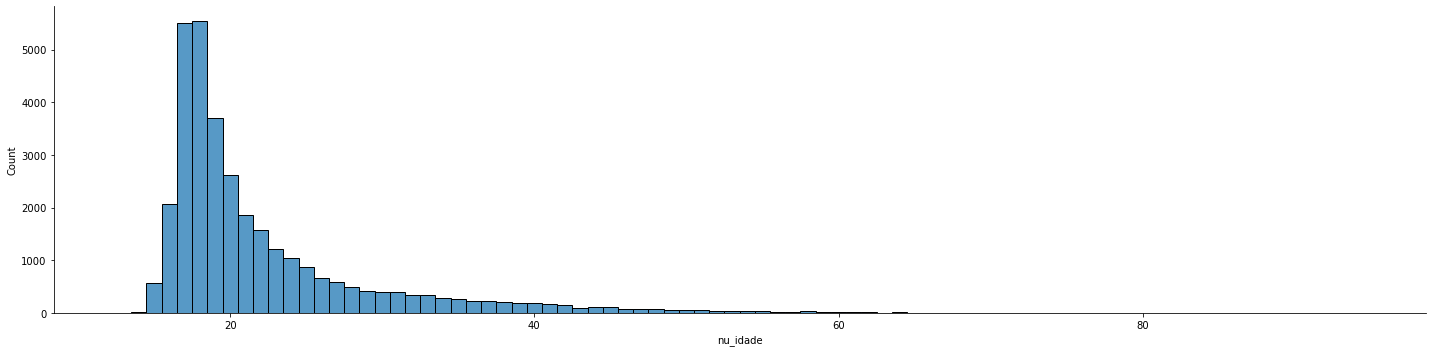

In [17]:
sns.displot(data=df, x='nu_idade', discrete=True, aspect=4)

<AxesSubplot:xlabel='nu_idade'>

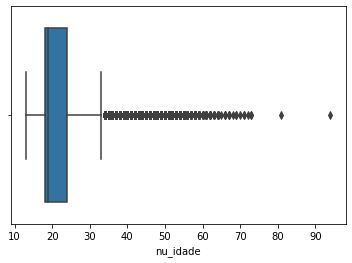

In [19]:
sns.boxplot(data=df, x='nu_idade')

In [20]:
df[df['nu_idade'] > 75]

,no_municipio_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,no_municipio_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,no_municipio_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_tempo_adicional,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,no_municipio_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
493325,Itaporanga d'Ajuda,SE,94.0,Feminino,Solteiro(a),Não declarado,Brasileiro(a),Itaporanga d'Ajuda,SE,Já concluí o Ensino Médio,Antes de 2007,Não respondeu,Ensino Regular,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Itaporanga d'Ajuda,SE,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,NaN,NaN,NaN,NaN,Espanhol,NaN,NaN,Não sei.,Não sei.,Não sei.,Não sei.,2,"Até R$ 998,00.",Não.,"Sim, um.","Sim, dois.",Não.,Não.,"Sim, um.",Não.,Não.,Não.,Não.,Não.,Não.,"Sim, um.",Não.,Não.,"Sim, um.",Não.,Não.,Sim
2513689,São Paulo,SP,81.0,Feminino,Viuvo(a),Branca,Brasileiro(a),Itapuí,SP,Já concluí o Ensino Médio,Antes de 2007,Não respondeu,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,São Paulo,SP,Presente na prova,Presente na prova,Presente na prova,Presente na prova,523.7,462.0,435.8,374.8,Espanhol,Sem problemas,300.0,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...,"Grupo 2: Diarista, empregado doméstico, cuidad...",Não sei.,1,"De R$ 2.495,01 até R$ 2.994,00.",Não.,"Sim, dois.","Sim, três.","Sim, um.",Não.,"Sim, um.","Sim, um.","Sim, um.",Não.,Não.,Não.,"Sim, um.","Sim, um.",Não.,Não.,"Sim, um.","Sim, um.","Sim, um.",Sim


In [26]:
df[df['nu_idade'].isnull()]

,no_municipio_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,no_municipio_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,no_municipio_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_tempo_adicional,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,no_municipio_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
2671263,Bálsamo,SP,NaN,Masculino,Solteiro(a),Branca,Brasileiro(a),Tanabi,SP,Estou cursando e concluirei o Ensino Médio no ...,Não informado,Pública,Ensino Regular,Não,35028642.0,Bálsamo,SP,Estadual,Urbana,Em atividade,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Mirassol,SP,Faltou à prova,Faltou à prova,Faltou à prova,Faltou à prova,NaN,NaN,NaN,NaN,Inglês,NaN,NaN,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavrador, agricultor sem empregados, ...",3,"De R$ 1.996,01 até R$ 2.495,00.",Não.,"Sim, um.","Sim, três.","Sim, um.","Sim, um.","Sim, dois.","Sim, um.","Sim, um.","Sim, um.","Sim, um.",Não.,"Sim, um.","Sim, três.","Sim, um.","Sim, um.","Sim, quatro ou mais.",Não.,Não.,Não


Sexo

In [22]:
df['tp_sexo'].value_counts(normalize=True, dropna=False)

Feminino     0.595066
Masculino    0.404934
Name: tp_sexo, dtype: float64

Estado Civil

In [27]:
df['tp_estado_civil'].value_counts(normalize=True)

Solteiro(a)                                0.862707
Casado(a)/Mora com companheiro(a)          0.078837
Não informado                              0.040430
Divorciado(a)/Desquitado(a)/Separado(a)    0.016667
Viuvo(a)                                   0.001359
Name: tp_estado_civil, dtype: float64

Cor/Raça

In [28]:
df['tp_cor_raca'].value_counts(normalize=True)

Parda            0.467013
Branca           0.358042
Preta            0.129503
Amarela          0.021166
Não declarado    0.018902
Indígena         0.005375
Name: tp_cor_raca, dtype: float64

Nacionalidade

In [29]:
df['tp_nacionalidade'].value_counts(normalize=True)

Brasileiro(a)                                    0.972735
Brasileiro(a) Naturalizado(a)                    0.023672
Brasileiro(a) Nato(a), nascido(a) no exterior    0.001238
Estrangeiro(a)                                   0.001208
Não informado                                    0.001147
Name: tp_nacionalidade, dtype: float64

In [31]:
df[df['tp_nacionalidade'] == 'Não informado'].head()

,no_municipio_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,no_municipio_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,no_municipio_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_tempo_adicional,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,no_municipio_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tp_lingua,tp_status_redacao,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025
70660,Paço do Lumiar,MA,19.0,Feminino,Solteiro(a),Branca,Não informado,NaN,NaN,Já concluí o Ensino Médio,2018,Não respondeu,Ensino Regular,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,São Luís,MA,Presente na prova,Presente na prova,Presente na prova,Presente na prova,403.0,475.5,475.2,409.9,Espanhol,Sem problemas,540.0,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...","Grupo 2: Diarista, empregado doméstico, cuidad...","Grupo 2: Diarista, empregado doméstico, cuidad...",4,"De R$ 998,01 até R$ 1.497,00.",Não.,"Sim, um.","Sim, três.",Não.,Não.,"Sim, um.",Não.,Não.,Não.,Não.,Não.,Não.,"Sim, um.","Sim, um.",Não.,"Sim, três.",Não.,"Sim, um.",Não
193865,Rio de Janeiro,RJ,18.0,Masculino,Solteiro(a),Branca,Não informado,NaN,NaN,Estou cursando e concluirei o Ensino Médio no ...,Não informado,Privada,Ensino Regular,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Rio de Janeiro,RJ,Presente na prova,Presente na prova,Presente na prova,Presente na prova,491.2,525.5,499.2,422.4,Inglês,Sem problemas,720.0,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ...","Grupo 2: Diarista, empregado doméstico, cuidad...","Grupo 2: Diarista, empregado doméstico, cuidad...",4,"De R$ 998,01 até R$ 1.497,00.",Não.,"Sim, um.","Sim, um.","Sim, um.",Não.,"Sim, um.",Não.,"Sim, um.",Não.,Não.,Não.,Não.,"Sim, um.",Não.,Não.,"Sim, três.","Sim, um.",Não.,Sim
205489,São Gonçalo do Amarante,RN,38.0,Feminino,Solteiro(a),Branca,Não informado,NaN,NaN,Já concluí o Ensino Médio,Antes de 2007,Não respondeu,Ensino Regular,Não,NaN,NaN,NaN,NaN,NaN,NaN,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,São Gonçalo do Amarante,RN,Presente na prova,Presente na prova,Presente na prova,Presente na prova,405.0,400.1,388.4,450.1,Inglês,Sem problemas,260.0,Nunca estudou.,Nunca estudou.,"Grupo 1: Lavrador, agricultor sem empregados, ...","Grupo 1: Lavrador, agricultor sem empregados, ...",5,Nenhuma renda.,Não.,"Sim, um.","Sim, um.",Não.,

Municipio de nascimento

In [33]:
(df['no_municipio_nascimento'].astype(str) + '/' + df['sg_uf_nascimento'].astype(str)).value_counts(normalize=True, dropna=False).head(20)

São Paulo/SP         0.052236
Rio de Janeiro/RJ    0.027869
NaN                  0.027265
Brasília/DF          0.018660
Fortaleza/CE         0.018600
Belém/PA             0.017724
Belo Horizonte/MG    0.017694
Salvador/BA          0.016244
Recife/PE            0.014221
São Luís/MA          0.014191
Manaus/AM            0.013950
Teresina/PI          0.009028
Curitiba/PR          0.008334
Porto Alegre/RS      0.008092
Goiânia/GO           0.007941
Maceió/AL            0.007096
Natal/RN             0.007035
João Pessoa/PB       0.006613
Aracaju/SE           0.005495
Campina Grande/PB    0.005375
dtype: float64

UF de nascimento

In [34]:
df['sg_uf_nascimento'].value_counts(normalize=True, dropna=False)

SP     0.156768
MG     0.103355
BA     0.077146
RJ     0.065310
PA     0.060147
CE     0.056886
PE     0.051028
MA     0.046922
RS     0.044144
PR     0.038618
PB     0.027899
NaN    0.027265
GO     0.026601
PI     0.024487
RN     0.022102
AM     0.021770
AL     0.019294
DF     0.018660
ES     0.018177
SC     0.016546
MT     0.015459
SE     0.013195
MS     0.012682
RO     0.010840
TO     0.008243
AC     0.007579
AP     0.006643
RR     0.002234
Name: sg_uf_nascimento, dtype: float64

Situação conclusão

In [35]:
df['tp_st_conclusao'].value_counts(normalize=True)

Já concluí o Ensino Médio                                         0.590718
Estou cursando e concluirei o Ensino Médio no ano corrente        0.282949
Estou cursando e concluirei o Ensino Médio após o ano corrente    0.122679
Não concluí e não estou cursando o Ensino Médio                   0.003653
Name: tp_st_conclusao, dtype: float64

Ano conclusão

In [36]:
df['tp_ano_concluiu'].value_counts(normalize=True)

Não informado    0.428727
2018             0.129593
2017             0.090039
Antes de 2007    0.081011
2016             0.059030
2015             0.044929
2014             0.037109
2013             0.029379
2012             0.025273
2011             0.019234
2010             0.017029
2009             0.015429
2008             0.012047
2007             0.011172
Name: tp_ano_concluiu, dtype: float64

Treineiro

In [40]:
df['in_treineiro'].value_counts(normalize=True)

Não    0.877321
Sim    0.122679
Name: in_treineiro, dtype: float64

Escola

In [37]:
df['tp_escola'].value_counts(normalize=True)

Não respondeu    0.717051
Pública          0.240527
Privada          0.042423
Name: tp_escola, dtype: float64

Ensino

In [39]:
df['tp_ensino'].value_counts(normalize=True, dropna=False)

Ensino Regular                                 0.561460
NaN                                            0.435762
Educação Especial - Modalidade Substitutiva    0.002778
Name: tp_ensino, dtype: float64

Municipio da Escola

In [41]:
(df['no_municipio_esc'].astype(str) + '/' + df['sg_uf_esc'].astype(str)).value_counts(normalize=True, dropna=False)

NaN                  0.778133
São Paulo/SP         0.010538
Fortaleza/CE         0.006069
Rio de Janeiro/RJ    0.005465
Brasília/DF          0.004227
                       ...   
Guadalupe/PI         0.000030
Viana/MA             0.000030
Pinhão/PR            0.000030
Camamu/BA            0.000030
Almas/TO             0.000030
Length: 2059, dtype: float64

UF da escola

In [42]:
df['sg_uf_esc'].value_counts(normalize=True, dropna=False)

NaN    0.778133
SP     0.043298
CE     0.022646
MG     0.020532
RJ     0.014403
BA     0.013618
PE     0.011293
PR     0.010266
RS     0.009058
PA     0.008907
MA     0.008666
GO     0.006794
SC     0.005888
PI     0.005012
PB     0.004891
AM     0.004620
ES     0.004378
DF     0.004227
RN     0.004016
MT     0.003653
AL     0.003321
MS     0.003080
SE     0.002778
RO     0.002144
TO     0.001510
AP     0.001268
AC     0.000966
RR     0.000634
Name: sg_uf_esc, dtype: float64

Dependencia administrativa da escola

In [43]:
df['tp_dependencia_adm_esc'].value_counts(normalize=True, dropna=False)

NaN          0.778133
Estadual     0.178025
Privada      0.031643
Federal      0.010266
Municipal    0.001932
Name: tp_dependencia_adm_esc, dtype: float64

Localizaçao da escola

In [44]:
df['tp_localizacao_esc'].value_counts(normalize=True, dropna=False)

NaN       0.778133
Urbana    0.213805
Rural     0.008062
Name: tp_localizacao_esc, dtype: float64

Funcionamento da escola

In [45]:
df['tp_sit_func_esc'].value_counts(normalize=True, dropna=False)

NaN             0.778133
Em atividade    0.221263
4.0             0.000362
Paralisada      0.000211
Extinta         0.000030
Name: tp_sit_func_esc, dtype: float64

Municipio da prova

In [51]:
(df['no_municipio_prova'].astype(str) + '/' + df['sg_uf_prova'].astype(str)).value_counts(normalize=True)

São Paulo/SP                0.045110
Rio de Janeiro/RJ           0.026329
Brasília/DF                 0.019445
Fortaleza/CE                0.018267
Manaus/AM                   0.017271
                              ...   
Rorainópolis/RR             0.000030
Floresta do Araguaia/PA     0.000030
Barreira/CE                 0.000030
São Félix do Araguaia/MT    0.000030
Barra do Turvo/SP           0.000030
Length: 1690, dtype: float64

Presença

In [52]:
df[['tp_presenca_ch', 'tp_presenca_lc']].value_counts(normalize=True)

tp_presenca_ch      tp_presenca_lc    
Presente na prova   Presente na prova     0.766267
Faltou à prova      Faltou à prova        0.233008
Eliminado na prova  Eliminado na prova    0.000725
dtype: float64

In [53]:
df[['tp_presenca_cn', 'tp_presenca_mt']].value_counts(normalize=True)

tp_presenca_cn      tp_presenca_mt    
Presente na prova   Presente na prova     0.723331
Faltou à prova      Faltou à prova        0.276276
Eliminado na prova  Eliminado na prova    0.000393
dtype: float64

In [54]:
df[['tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_cn', 'tp_presenca_mt']].value_counts(normalize=True)

tp_presenca_ch      tp_presenca_lc      tp_presenca_cn      tp_presenca_mt    
Presente na prova   Presente na prova   Presente na prova   Presente na prova     0.721821
Faltou à prova      Faltou à prova      Faltou à prova      Faltou à prova        0.231650
Presente na prova   Presente na prova   Faltou à prova      Faltou à prova        0.044053
Faltou à prova      Faltou à prova      Presente na prova   Presente na prova     0.001359
Eliminado na prova  Eliminado na prova  Faltou à prova      Faltou à prova        0.000574
Presente na prova   Presente na prova   Eliminado na prova  Eliminado na prova    0.000393
Eliminado na prova  Eliminado na prova  Presente na prova   Presente na prova     0.000151
dtype: float64

Notas

In [56]:
df[['nu_nota_ch', 'nu_nota_lc', 'nu_nota_cn', 'nu_nota_mt', 'nu_nota_redacao']].describe()

,nu_nota_ch,nu_nota_lc,nu_nota_cn,nu_nota_mt,nu_nota_redacao
count,25378.000000,25378.000000,23956.000000,23956.000000,25378.000000
mean,506.427863,520.075227,477.715508,522.456128,570.857436
std,82.748042,64.506514,76.074670,109.372031,188.440081
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,447.025000,482.400000,418.100000,435.100000,480.000000
50%,510.400000,525.500000,469.700000,500.100000,580.000000
75%,565.900000,564.400000,532.100000,596.900000,680.000000
max,783.000000,718.200000,847.800000,985.000000,980.000000


Ligua estrangeira

In [57]:
df['tp_lingua'].value_counts(normalize=True)

Espanhol    0.52405
Inglês      0.47595
Name: tp_lingua, dtype: float64

Status da redação

In [58]:
df['tp_status_redacao'].value_counts(normalize=True, dropna=False)

Sem problemas                      0.737824
NaN                                0.233733
Em Branco                          0.011021
Fuga ao tema                       0.007337
Cópia Texto Motivador              0.004891
Texto insuficiente                 0.002204
Anulada                            0.001117
Parte desconectada                 0.001027
Não atendimento ao tipo textual    0.000845
Name: tp_status_redacao, dtype: float64

Indicadores

In [89]:
(df[df.filter(like='in_').columns[1:]] == 'Sim').sum() / df.shape[0]

in_baixa_visao                 0.001298
in_cegueira                    0.000151
in_surdez                      0.000423
in_deficiencia_auditiva        0.000423
in_surdo_cegueira              0.000000
in_deficiencia_fisica          0.001510
in_deficiencia_mental          0.000423
in_deficit_atencao             0.001510
in_dislexia                    0.000151
in_discalculia                 0.000030
in_autismo                     0.000211
in_visao_monocular             0.000151
in_outra_def                   0.000513
in_gestante                    0.000181
in_lactante                    0.000574
in_idoso                       0.000000
in_estuda_classe_hospitalar    0.000000
in_sem_recurso                 0.001117
in_braille                     0.000030
in_ampliada_24                 0.000151
in_ampliada_18                 0.000966
in_ledor                       0.001087
in_acesso                      0.001570
in_transcricao                 0.001057
in_libras                      0.000332


Questionario socio-economico

In [90]:
df['q001'].value_counts(normalize=True)

Completou o Ensino Médio, mas não completou a Faculdade.                                   0.255593
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     0.225580
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    0.141792
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       0.115553
Não sei.                                                                                   0.086174
Completou a Faculdade, mas não completou a Pós-graduação.                                  0.074761
Nunca estudou.                                                                             0.058305
Completou a Pós-graduação.                                                                 0.042242
Name: q001, dtype: float64

In [91]:
df['q002'].value_counts(normalize=True)

Completou o Ensino Médio, mas não completou a Faculdade.                                   0.323349
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     0.167155
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    0.134938
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       0.130831
Completou a Faculdade, mas não completou a Pós-graduação.                                  0.099490
Completou a Pós-graduação.                                                                 0.079048
Nunca estudou.                                                                             0.037109
Não sei.                                                                                   0.028081
Name: q002, dtype: float64

In [92]:
df['q003'].value_counts(normalize=True)

Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.                                                                                                                                                                         0.233733
Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.                                                                                                                                                                                                                                                              0.217036
Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorist

In [93]:
df['q004'].value_counts(normalize=True)

Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.                                                                                                      0.433407
Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.    0.200791
Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, 

In [94]:
df['q005'].value_counts(normalize=True)

4     0.324829
3     0.259881
5     0.161841
2     0.122739
6     0.060660
1     0.026661
7     0.024608
8     0.009421
9     0.003714
10    0.003080
11    0.001117
12    0.000483
15    0.000302
13    0.000242
16    0.000181
14    0.000151
18    0.000030
19    0.000030
20    0.000030
Name: q005, dtype: float64

In [95]:
df['q006'].value_counts(normalize=True)

De R$ 998,01 até R$ 1.497,00.        0.261089
Até R$ 998,00.                       0.248860
De R$ 1.497,01 até R$ 1.996,00.      0.095987
De R$ 1.996,01 até R$ 2.495,00.      0.093089
De R$ 2.994,01 até R$ 3.992,00.      0.060720
De R$ 2.495,01 até R$ 2.994,00.      0.045533
Nenhuma renda.                       0.044959
De R$ 3.992,01 até R$ 4.990,00.      0.038226
De R$ 4.990,01 até R$ 5.988,00.      0.026631
De R$ 5.988,01 até R$ 6.986,00.      0.015852
De R$ 9.980,01 até R$ 11.976,00.     0.012651
De R$ 6.986,01 até R$ 7.984,00.      0.011625
Mais de R$ 19.960,00.                0.010447
De R$ 11.976,01 até R$ 14.970,00.    0.009451
De R$ 8.982,01 até R$ 9.980,00.      0.008877
De R$ 7.984,01 até R$ 8.982,00.      0.008605
De R$ 14.970,01 até R$ 19.960,00.    0.007398
Name: q006, dtype: float64

In [96]:
df['q007'].value_counts(normalize=True)

Não.                                      0.927655
Sim, um ou dois dias por semana.          0.038769
Sim, pelo menos cinco dias por semana.    0.025423
Sim, três ou quatro dias por semana.      0.008152
Name: q007, dtype: float64

In [97]:
df['q008'].value_counts(normalize=True)

Sim, um.                0.707419
Sim, dois.              0.202724
Sim, três.              0.053142
Sim, quatro ou mais.    0.026541
Não.                    0.010175
Name: q008, dtype: float64

#### Relação com as notas

Sexo

In [114]:
def plot_relation(objective_column, figsize=(10, 15)):
    grade_columns = ['nu_nota_ch', 'nu_nota_lc', 'nu_nota_cn', 'nu_nota_mt', 'nu_nota_redacao']
    fig, axs = plt.subplots(5, 1, sharex=True, figsize=figsize)
    fig.suptitle(objective_column)

    for i in range(5):
        axs[i].set_title(grade_columns[i])
        sns.kdeplot(data=df, x=grade_columns[i], hue=objective_column, ax=axs[i])

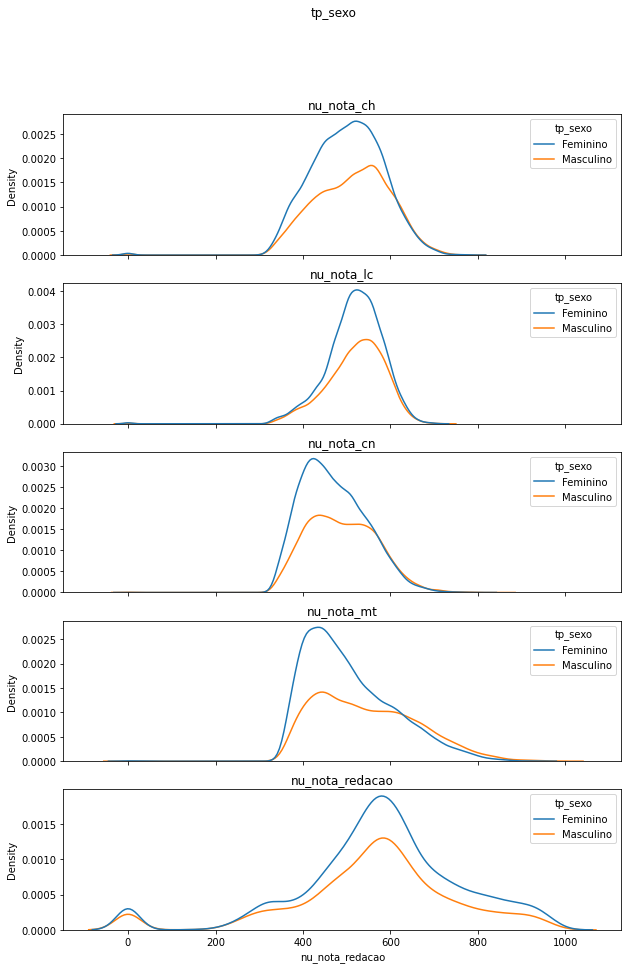

In [111]:
plot_relation('tp_sexo')
# sns.displot(data=df, x='nu_nota_ch', hue='tp_sexo', kind='kde')

Cor/Raça

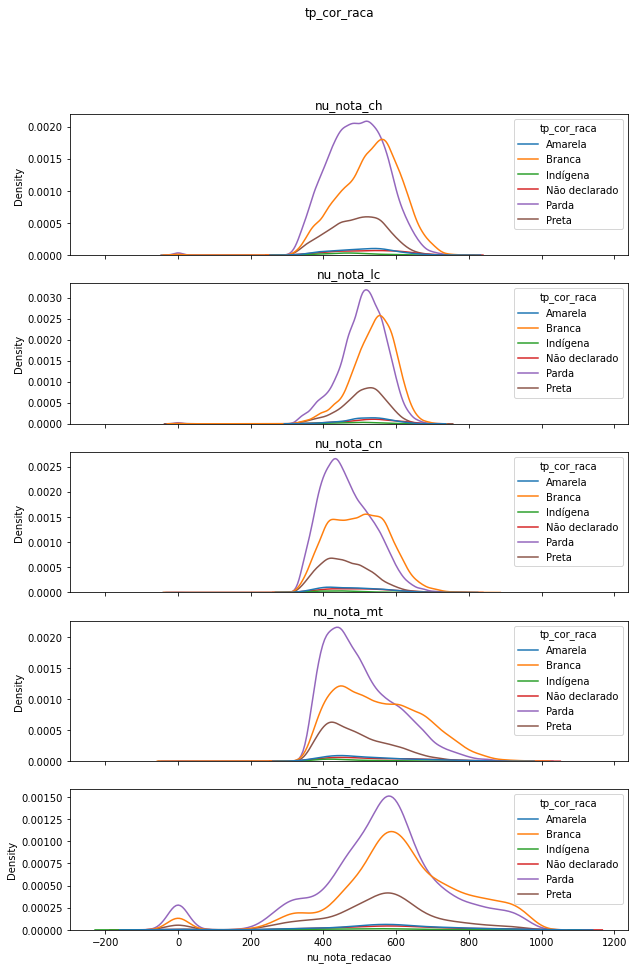

In [112]:
plot_relation('tp_cor_raca')

Conclusão do ensino medio

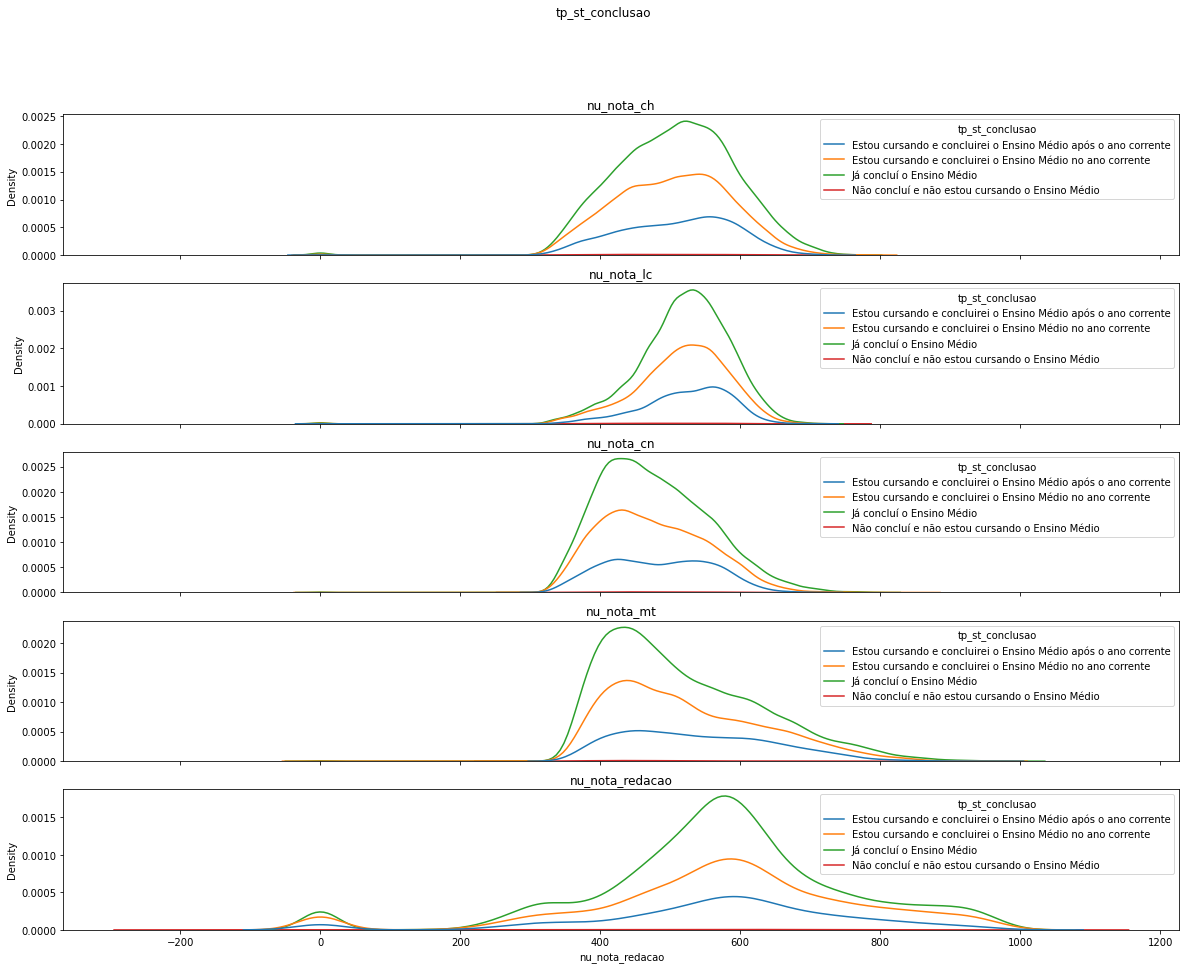

In [115]:
plot_relation('tp_st_conclusao', figsize=(20,15))

Escola

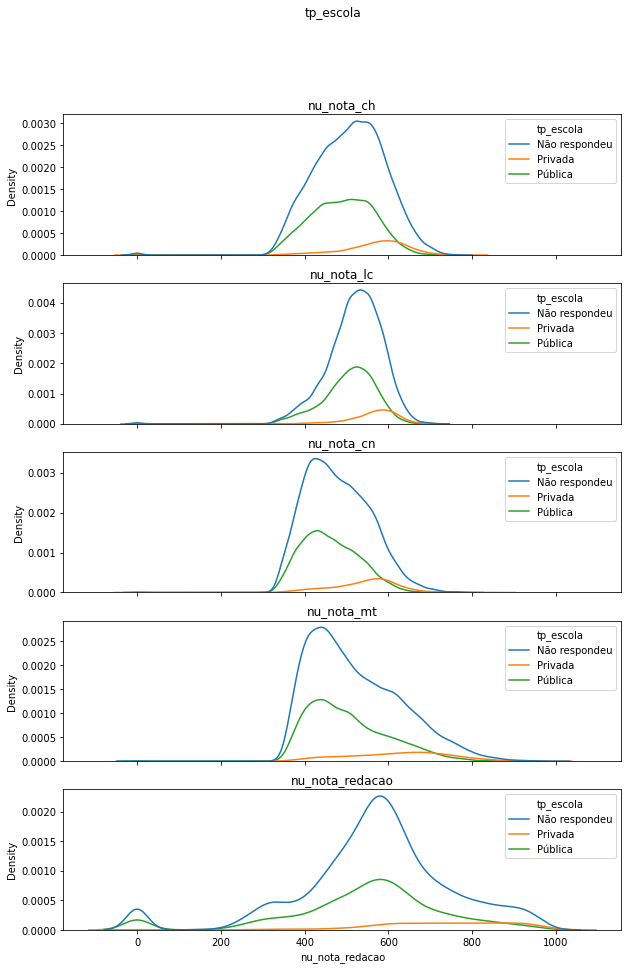

In [116]:
plot_relation('tp_escola')

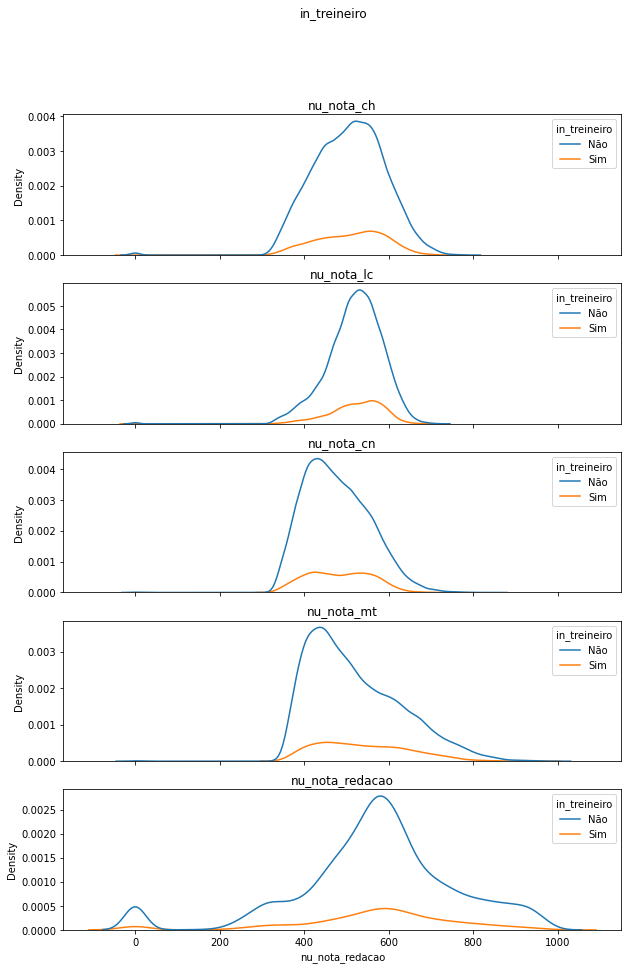

In [118]:
plot_relation('in_treineiro')

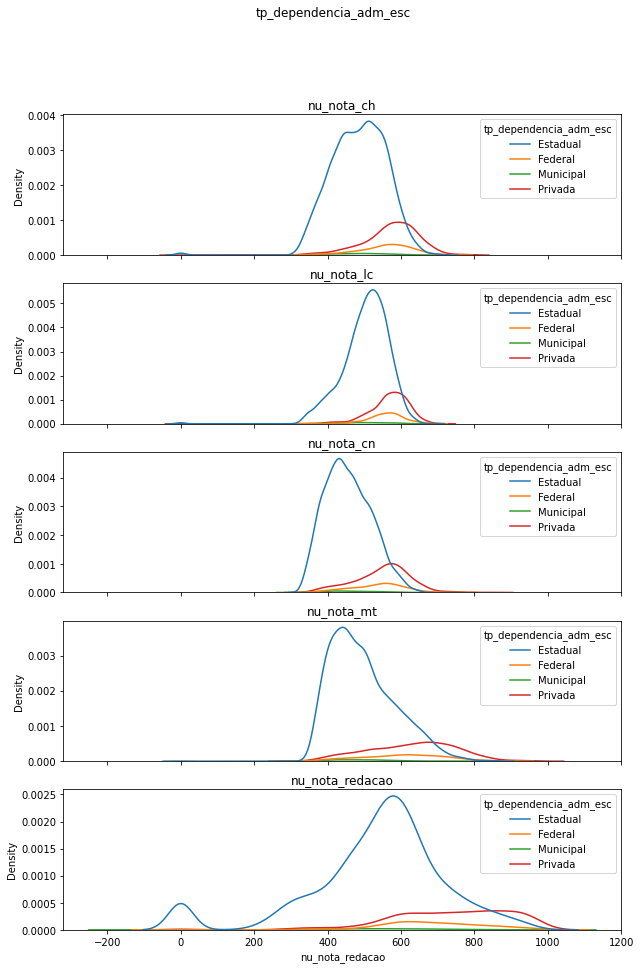

In [119]:
plot_relation('tp_dependencia_adm_esc')

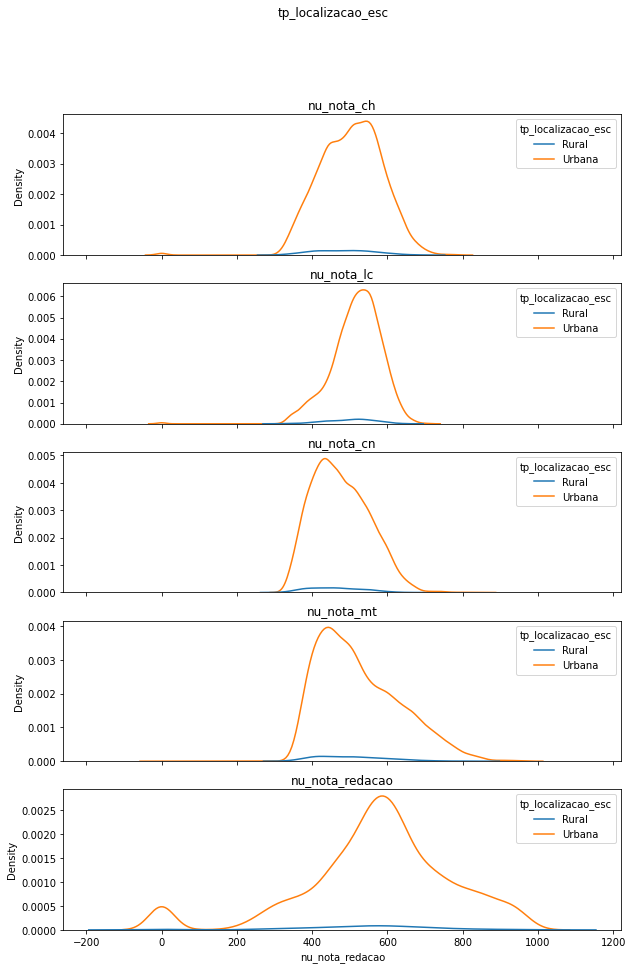

In [120]:
plot_relation('tp_localizacao_esc')

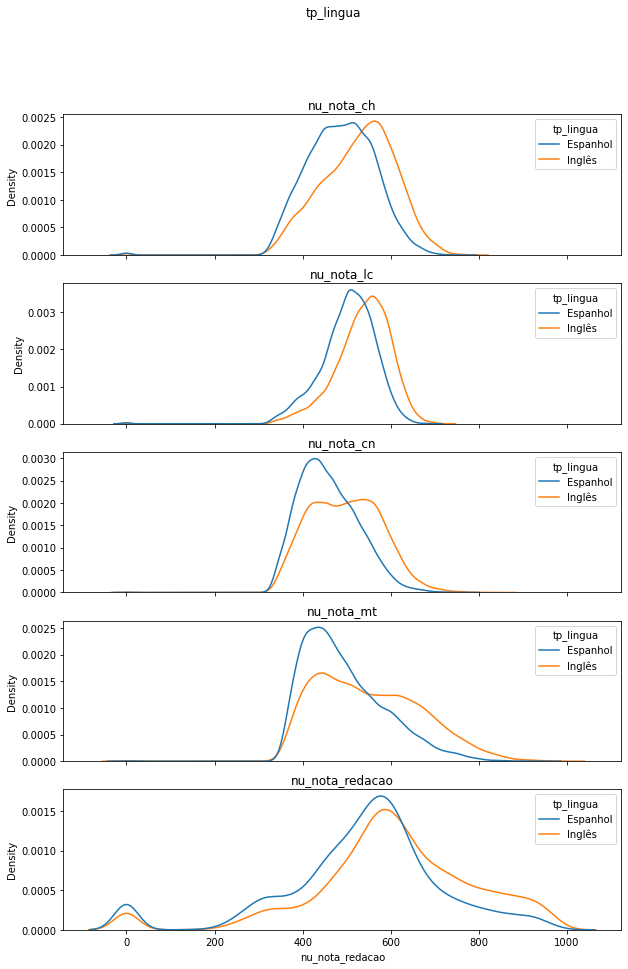

In [121]:
plot_relation('tp_lingua')

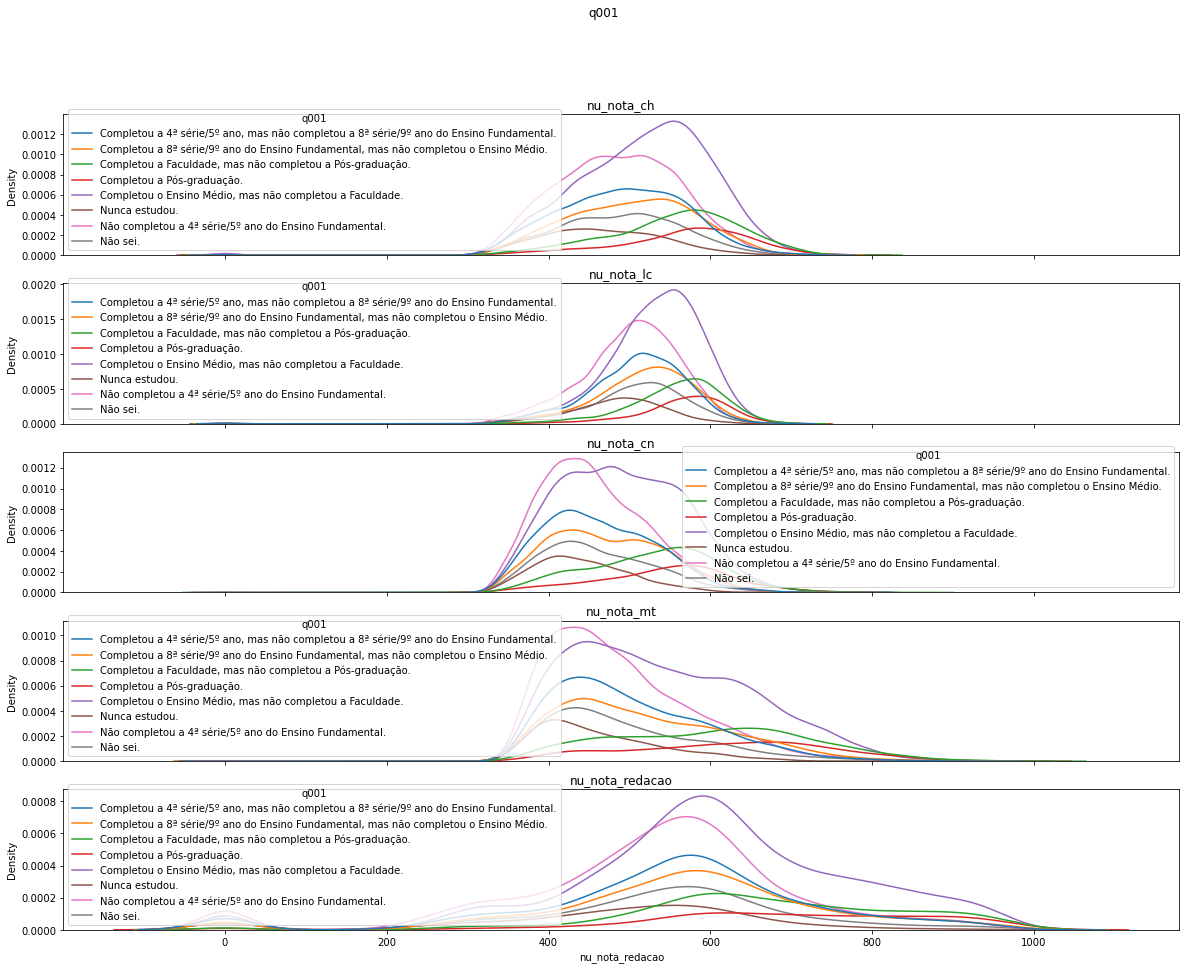

In [124]:
plot_relation('q001', figsize=(20,15))

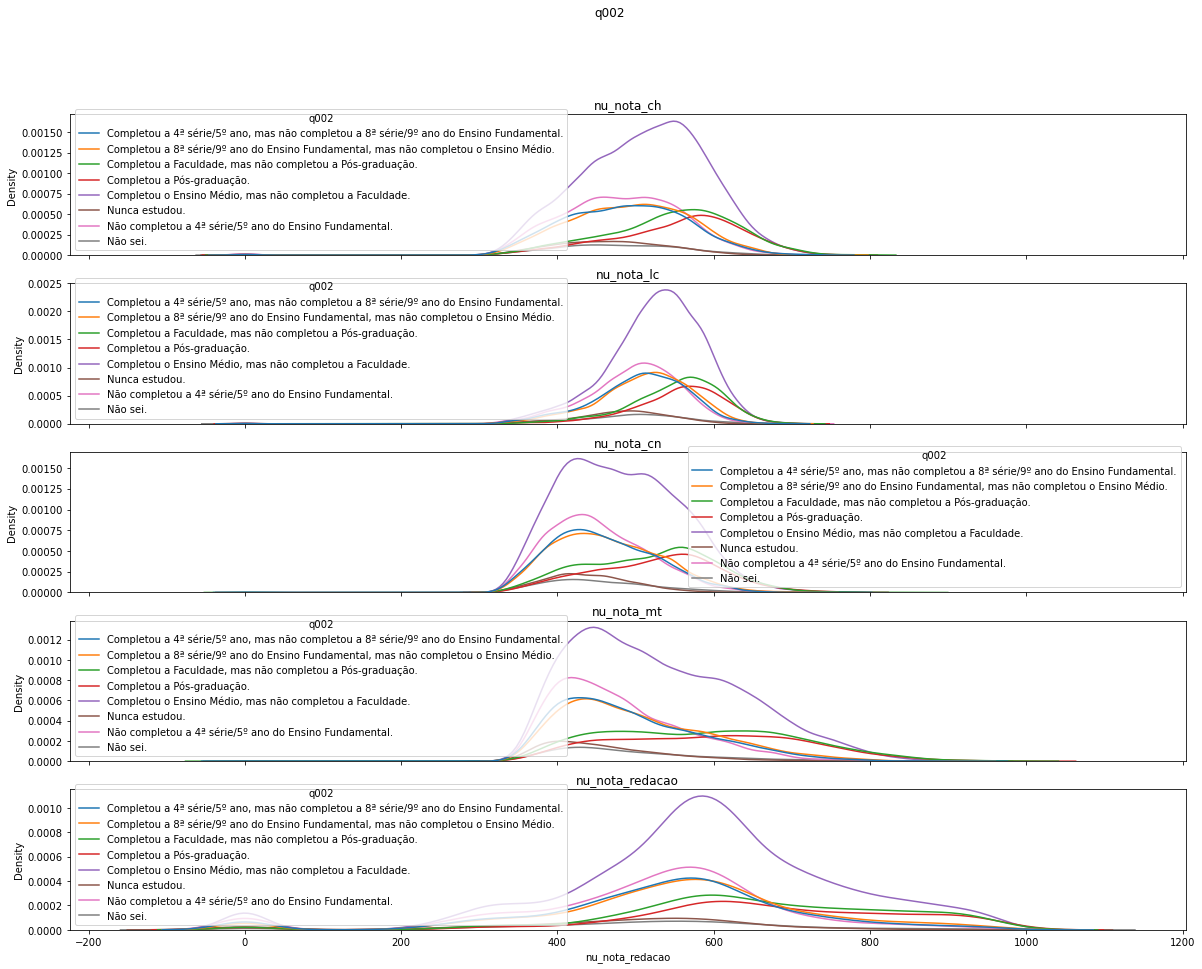

In [125]:
plot_relation('q002', figsize=(20,15))

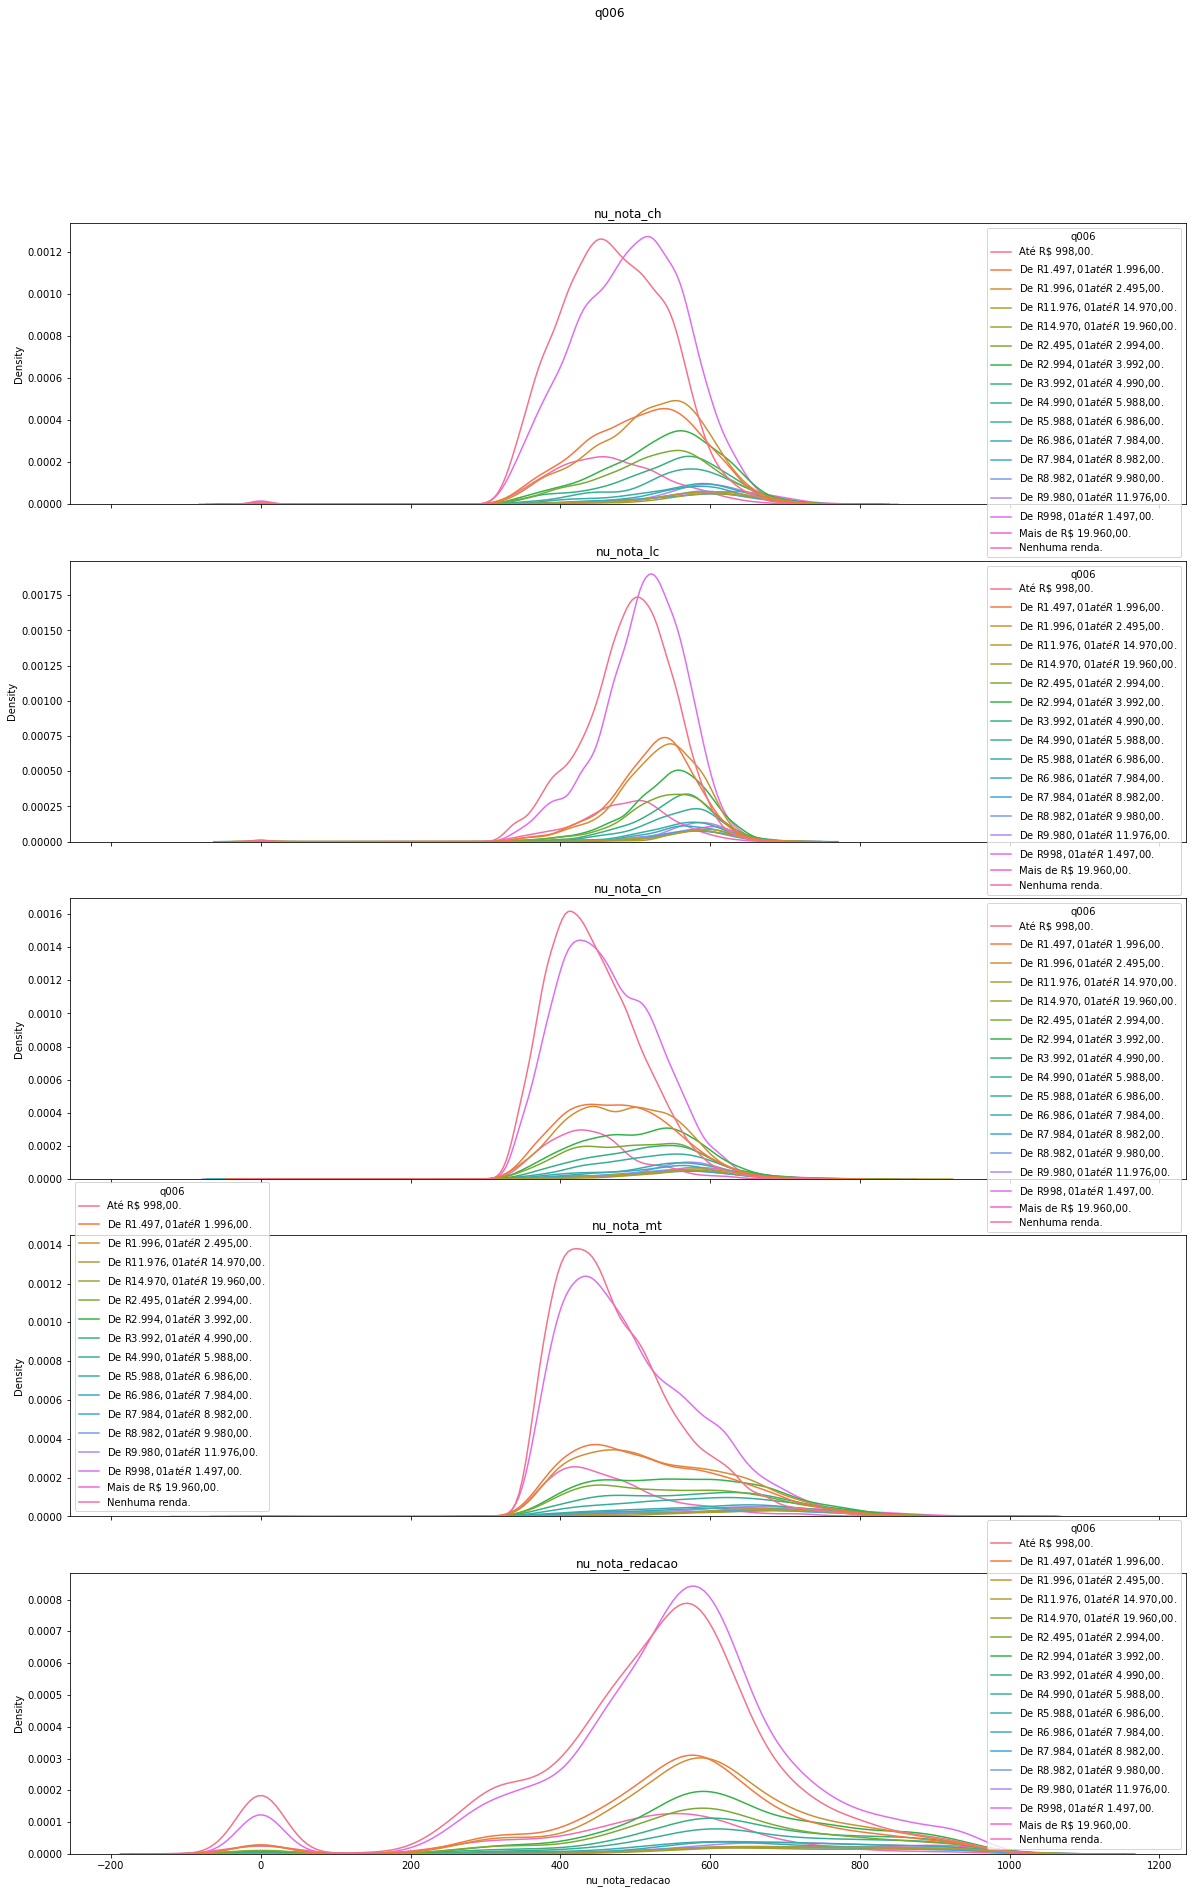

In [128]:
plot_relation('q006', figsize=(20,30))

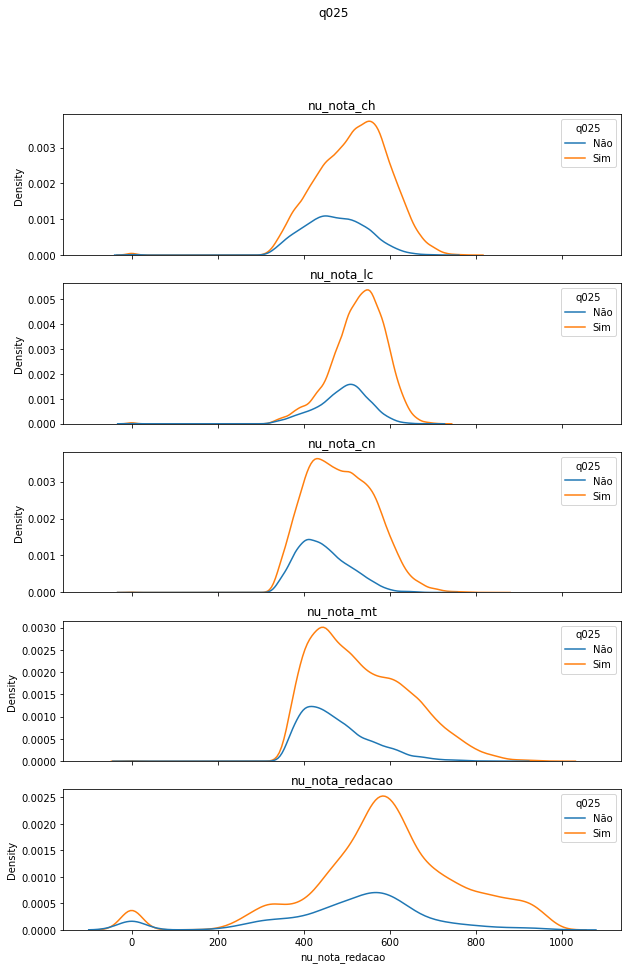

In [129]:
plot_relation('q025')

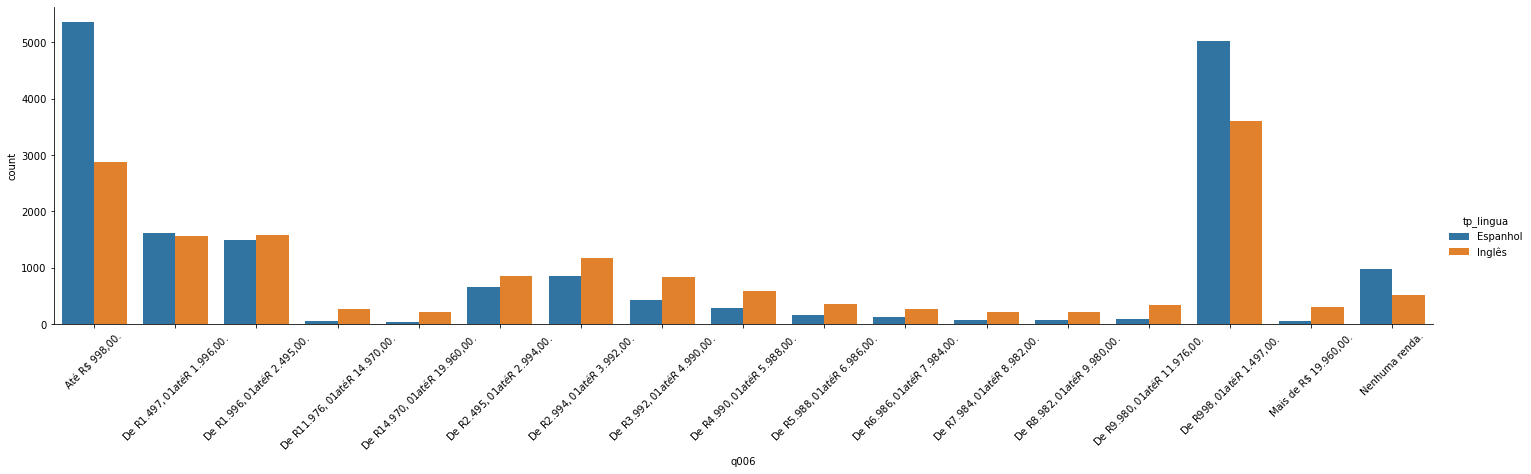

In [139]:
g = sns.catplot(data=df, x='q006', hue='tp_lingua', aspect=4, kind='count')
g.set_xticklabels(rotation=45)

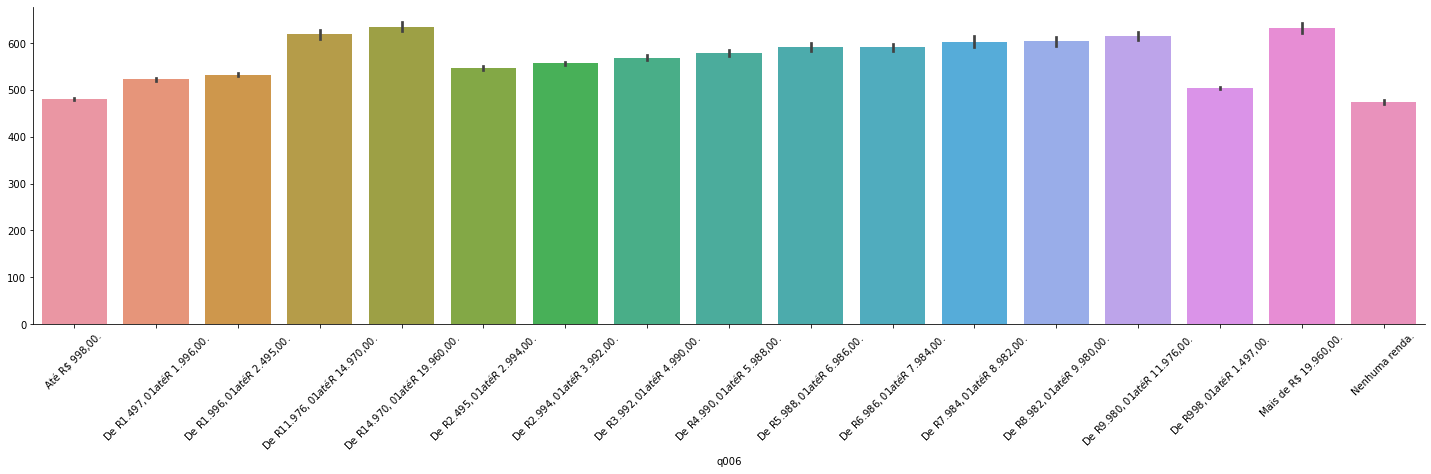

In [141]:
total_grade = df['nu_nota_ch'] + df['nu_nota_lc'] + df['nu_nota_cn'] + df['nu_nota_mt'] + df['nu_nota_redacao']
g = sns.catplot(data=df, x='q006', y=total_grade / 5, kind='bar', aspect=4)
g.set_xticklabels(rotation=45)